<a href="https://colab.research.google.com/github/NaithaniAR/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# Importing all the important Librarys and Data set

In [1]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import re
from wordcloud import WordCloud
#from fuzzywuzzy import process, fuzz

In [2]:
#To suppres scientific notation.
pd.options.display.float_format = '{:.2f}'.format 

pd.set_option('display.max_columns', None)

In [3]:
# Mounting the Google Drive folders to google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
meta_df = pd.read_csv('https://raw.githubusercontent.com/NaithaniAR/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Zomato%20Restaurant%20names%20and%20Metadata.csv')
reviews_df = pd.read_csv('https://raw.githubusercontent.com/NaithaniAR/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Zomato%20Restaurant%20reviews.csv')

---
# Dataset inspection
---

## Meta Data

In [5]:
# to get the first five rows of the data set 
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
# to get the information about the data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [7]:
# finding the count of null values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [8]:
# to get the description of the data
meta_df.describe().transpose()

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [9]:
#checking for duplicate entries
print('duplicates in entries = ',len(meta_df)-len(meta_df.drop_duplicates()))
print('duplicates in Restaurant Name = ',len(meta_df['Name'])-len(meta_df['Name'].drop_duplicates()))

duplicates in entries =  0
duplicates in Restaurant Name =  0


**Web Scraping**

There is a column with links to the zomato resturaunt of which the data is given. [Here ](https://colab.research.google.com/drive/1_l92E1d286rR8IJs3kzvq_TZy5wIOGV4#scrollTo=xwxi9maFzvg_) we will scrape data from zomato and update our meta data. 


In [10]:
# reading the dataframe from the csv file again to import the scraped data from the already prepared csv file

meta_df = pd.read_csv('https://raw.githubusercontent.com/NaithaniAR/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/new_meta.csv')

In [11]:
meta_df = meta_df.drop(['Unnamed: 0'], axis =1)

## Reviews

In [12]:
# to get the first five rows of the data set 
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [13]:
# to get the information about the data
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [14]:
# finding the count of null values
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

# Data Cleaning  

Defined Functions 


In [15]:
def Row_lis(DataFrame,Column_name):
 '''
 Convert a Row in a data frame into a list of unique elements 
 '''

 a = [Column_name]

 #Dropping na values from the dataframe 

 non_na= DataFrame.dropna()

 # Getting values into a list  
 arr = non_na[a].to_numpy()
 ''' 
 Reducing the dimensionality of a list 
 '''
 flat_ls = []
 for i in arr:
  for j in i:
    for k in j:
     flat_ls.append(k)
 '''
 Spliting the remaing strings 
 '''
 mylis=Elements=[s.strip() for sub in flat_ls for s in sub.split(', ',',',', ',' , ') if s]
 Elements=mylis
 print('List size:', len(Elements) )
 Elements = pd.DataFrame(Elements, columns = [a])
 
 return Elements,mylis


'__________________________________________________________________________________________________________________________________________'



def Row_lis2(DataFrame,Column_name):

 '''
 Convert a Row in a data frame into a list of unique elements 

 '''
 a = [Column_name]

 #Dropping na values from the dataframe 

 non_na= DataFrame.dropna()
 
 # Getting values into a list  
 arr = non_na[a].to_numpy()
 
 '''
 Reducing the dimensionality of a list 
 '''
 flat_ls = []
 for i in arr:
  for j in i:
   flat_ls.append(j)

 '''
 Spliting the remaing strings 

 '''
 
 mylis=[s.strip() for sub in flat_ls for s in sub.split(', ') if s]
 mylis=[s.strip() for sub in flat_ls for s in sub.split(' , ') if s]
 mylis=[s.strip() for sub in flat_ls for s in sub.split(' ,') if s]
 mylis=[s.strip() for sub in flat_ls for s in sub.split(',') if s]


 Elements=mylis
 print('List size:', len(Elements) )
 Elements = pd.DataFrame(Elements, columns = [a])

 
 return Elements,mylis


'__________________________________________________________________________________________________________________________________________'


def Row_lis3(DataFrame,Column_name):

 '''
 Convert a Row in a data frame into a list of unique elements 

 '''
 a = [Column_name]
 '''
 Dropping na values from the dataframe 
 '''
 #non_na= DataFrame.dropna()


 ''' 
 find the index no
 '''
 #b = DataFrame.columns.get_loc(a)
 '''
 Getting values into a Srting
 '''

 x=0
 Elements=''
 for x in range(0,len(meta_df)):
  b= str(meta_df.iloc[x][9]).replace('[','').replace(']','').replace('\'','').replace('\"','')
  Elements=Elements + b
  x+=1

 '''
 Spliting the remaing strings 

 '''

 mylis= Elements.split(', ')
 mylis= Elements.split(' , ')
 mylis= Elements.split(' ,')
 mylis= Elements.split(',')
 
 Elements = mylis

 print('List size:', len(Elements) )

 '''
 Converting the list into Pandas dataframe.
 '''
 Elements = pd.DataFrame(Elements, columns = [a])

 
 return Elements,mylis



'__________________________________________________________________________________________________________________________________________'


'''''
Unuique list 
'''''

def unique_list(input_list):
     output_list = []
     for word in input_list:
         if word not in input_list:
            output_list = [word]
            return output_list

'''
  This function takes a dictionary of mapping with keys as the charecters to be replaced in a string and
  the values as the characters to be replaced with
'''

def multiple_str_replaces(org_str,maps):

 for l,r in maps.items():
   org_str = org_str.replace(l,r)
   return org_str
'''
  This function takes a list of strings, removes special characters and give an output of a clean string 

'''

'__________________________________________________________________________________________________________________________________________'


def clean_str(input_string):
  '''
  First lets form a sentance.
  '''
  sentence = " ".join(b)
  sentence
  '''
  Dropping special characters 
  '''
  line = re.sub('[!@#$-]', '', sentence)

  return line

'__________________________________________________________________________________________________________________________________________'


def cld(b):

 '''
 First lets form a sentance from the string 
 '''
 sentence = " ".join(b)
 sentence
 '''
 Dropping special characters 
 '''
 line = re.sub('[!@#$-]', '', sentence)


 '''
 Printing word coud 
 '''

 plt.figure(figsize=(15,8))

 # Creating word_cloud with text as argument in .generate() method

 word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color ='black').generate(line)

 # Display the generated Word Cloud

 plt.imshow(word_cloud, interpolation='bilinear')

 plt.axis("off")
 return plt



## Meta Data 

Let us first explore the names of the column 

In [16]:
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'latitude', 'longitude', 'additional_services', 'Has_Featured',
       'known_for', 'status', 'Popular_Dishes'],
      dtype='object')

Q. Explore the names, find the most occuring trend while  naming
 a resturaunt. 

List size: 47


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

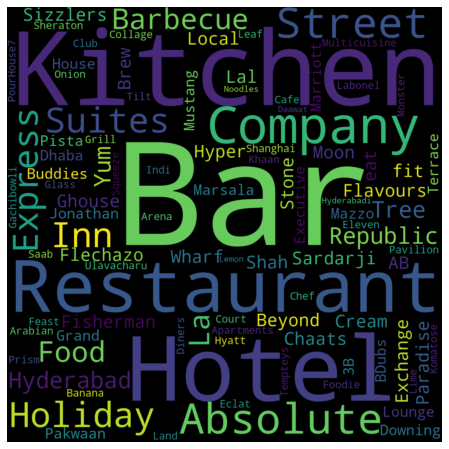

In [17]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 

a,b=Row_lis2(meta_df,'Name')

'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)

India is famous for itys street food, since the geographic location of the resturants is near many college campusus as seen above here, we can see its reflection on the word cloud. 

Kitchen , Hotel and Express services are availabe in the area. 

Q. Arrange the resturants in the df wrt. cost of one person.

In [18]:
# Changing the Data Type of the 'Cost'
#If generating error restart and run all

meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

In [19]:
meta_df.sort_values(by='Cost',ascending=False,inplace=True)


In [20]:
meta_df.reset_index(inplace=True)

In [21]:
meta_df[['Cost', 'Name', 'Popular_Dishes']]

,Cost,Name,Popular_Dishes
0,2800,Collage - Hyatt Hyderabad Gachibowli,"Sushi, Sunday Brunch, Pancakes, Salads, Desert..."
1,2500,Feast - Sheraton Hyderabad Hotel,"Sushi, Dal Makhni, Pastries, Mocktails, Cheese..."
2,1900,Jonathan's Kitchen - Holiday Inn Express & Suites,"Focaccia Al Pollo, Involtini Di Pollo, Jumbo P..."
3,1900,10 Downing Street,"Chicken Burritos, Wheat Beer, Brewed Beer, Chi..."
4,1800,Cascade - Radisson Hyderabad Hitec City,"Croissant, Dinner Buffet, Sunday Brunch, Deser..."
...,...,...,...
100,200,Momos Delight,NaN
101,200,Hunger Maggi Point,NaN
102,200,Sweet Basket,"Barfi, Bengali Sweets, Raj Kachori, Jalebi, Pa..."
103,150,Mohammedia Shawarma,NaN


Five most Expensive resturaunts in the df. 
1.             Collage - Hyatt Hyderabad Gachibowli

2.             Feast - Sheraton Hyderabad Hotel	

3.   Jonathan's Kitchen - Holiday Inn Express & Suites

4.                    10 Downing Street

5.                Cascade - Radisson Hyderabad Hitec City	


Cheapest resturaunts in the df
1.                                    Mohammedia Shawarma
2.                                                  Amul
3.                                         Asian Meal Box
4.                                          Sweet Basket
5.                                              KS Bakers

Q. Explore the Collections column

List size: 99


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

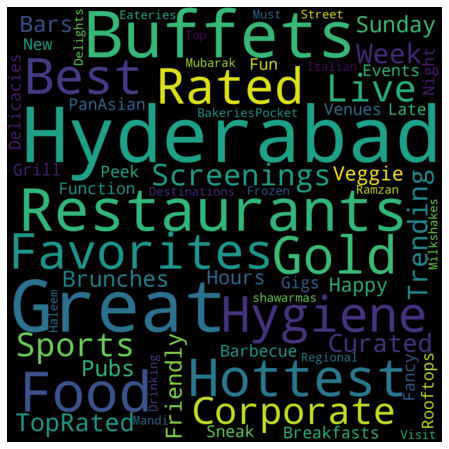

In [22]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 

a,b=Row_lis2(meta_df,'Collections')

'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)

Q. Explore the Collections known_for

List size: 276


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

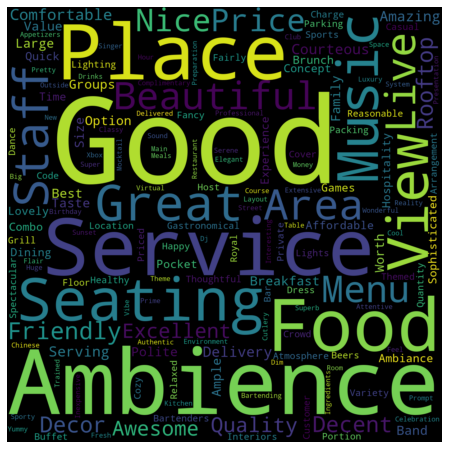

In [23]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 

a,b=Row_lis2(meta_df,'known_for')

'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)

 Q. Explore the Collections Cuisines

List size: 159


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

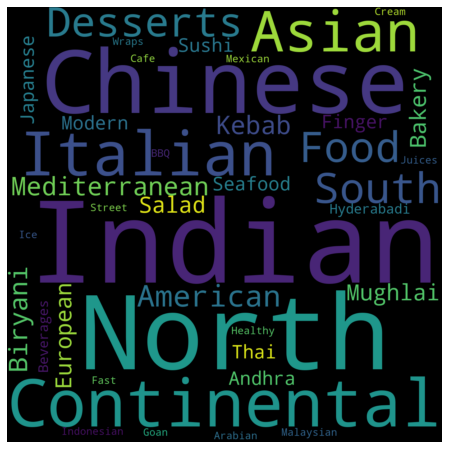

In [24]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 

a,b=Row_lis2(meta_df,'Cuisines')

'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)

In [25]:
a.value_counts()

(Cuisines,)  
North Indian     32
Chinese          22
Continental      14
Italian          12
Asian            10
South Indian      5
Desserts          5
Kebab             4
American          4
Mediterranean     4
Biryani           4
Bakery            3
European          3
Mughlai           3
Salad             3
Modern Indian     2
Thai              2
Japanese          2
Sushi             2
Hyderabadi        2
Andhra            2
Seafood           2
Finger Food       2
Beverages         2
Mexican           1
Street Food       1
Ice Cream         1
Malaysian         1
Juices            1
Indonesian        1
Healthy Food      1
Goan              1
Fast Food         1
Cafe              1
BBQ               1
Arabian           1
Wraps             1
dtype: int64

Q. Exploring Time Column 

In [26]:
meta_df['Timings']

0                                     24 Hours (Mon-Sun)
1      6:30am to 10:30am, 12:30pm to 3pm, 7pm to 11pm...
2                        11:30 AM to 3 PM, 7 PM to 11 PM
3                                 12 Noon to 12 Midnight
4                                               24 Hours
                             ...                        
100                                 6pm to 2am (Mon-Sun)
101                                   4:30 PM to 5:30 AM
102    10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...
103                                         1 PM to 1 AM
104                                        10 AM to 5 AM
Name: Timings, Length: 105, dtype: object

We will drop 

Q. What are the most comman services offered by the resturants ? 

List size: 457


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

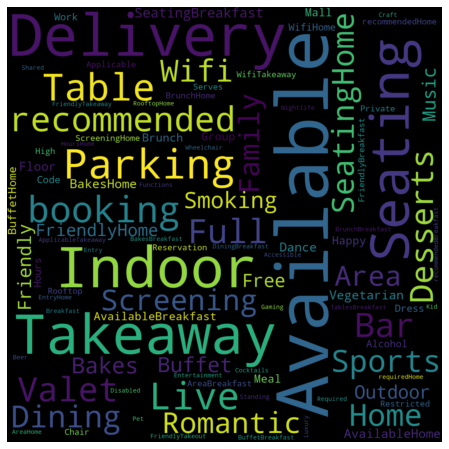

In [27]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 

a,b=Row_lis3(meta_df,'additional_services')

'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)


 **The most recurring features in the resturaunt are**
 
 Takeaway Available               
 Indoor Seating                   
 Table booking recommended        
 Valet Parking Available          
 Full Bar Available              

Q. What is the count of featured resturaunts in the DataFrame

In [28]:
meta_df['Has_Featured'].value_counts()


0.00    79
1.00    26
Name: Has_Featured, dtype: int64

Q. How many resturaunts have closed for business? 

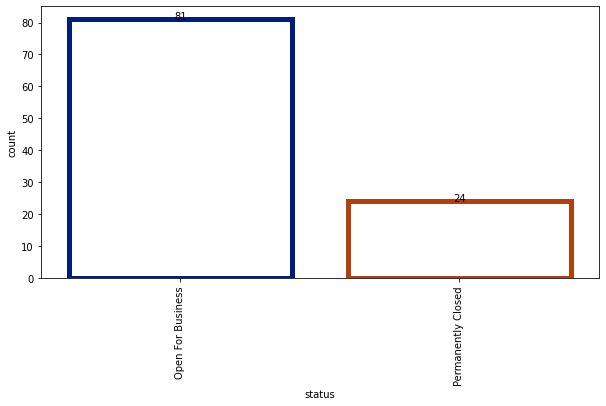

In [29]:
meta_df['status'].value_counts()
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(x="status", data=meta_df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        meta_df['status'].value_counts()[i],ha="center")
    i += 1

Q. What are the total number of unique popular dishes which are served ?

List size: 268


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

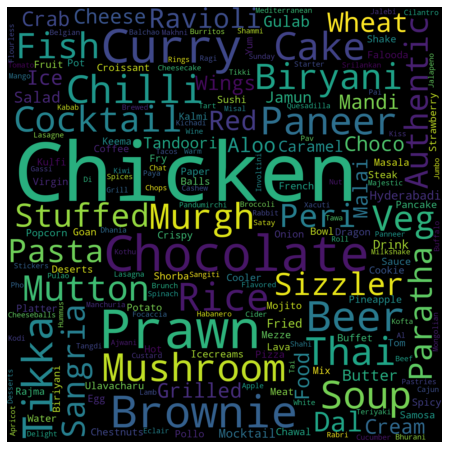

In [30]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 

a,b=Row_lis2(meta_df,'Popular_Dishes')

'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)

## Reviews 

In [31]:
reviews_df.columns


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

Q. How many reviews for each resturaunt are available ? 



In [32]:
reviews_df['Restaurant'].value_counts()

Beyond Flavours                   100
Dine O China                      100
Driven Cafe                       100
Labonel                           100
Eat India Company                 100
                                 ... 
Pot Pourri                        100
Hunger Maggi Point                100
Behrouz Biryani                   100
3B's - Buddies, Bar & Barbecue    100
Chinese Pavilion                  100
Name: Restaurant, Length: 100, dtype: int64

We can conclude that we have 100 reviews of 100 diffrent resturaunts. 

Q. Explore rows with nun values 

In [33]:
'''
Rows in which there are more than two null values 
'''

x= reviews_df.iloc[reviews_df[(reviews_df.isnull().sum(axis=1) >= 2)].index]

'''Storing index of this df'''
y= x.index

reviews_df.iloc[reviews_df[(reviews_df.isnull().sum(axis=1) >= 2)].index]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


We see that all values in these rows are null hence we will drop these rows. 

In [34]:
reviews_df.drop(y, inplace = True)

Exploring Time.

In [35]:
#Splitting time into various columns. 

'''
comverting time to DateTime format
'''
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])

'''
Creating new columns based on DateTime
'''

reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

'''
Dropping time column 
'''
reviews_df = reviews_df.drop(['Time'], axis =1)

In [36]:
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64


Q. Which resturaunt had the maximum and minimum rating in 2019

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


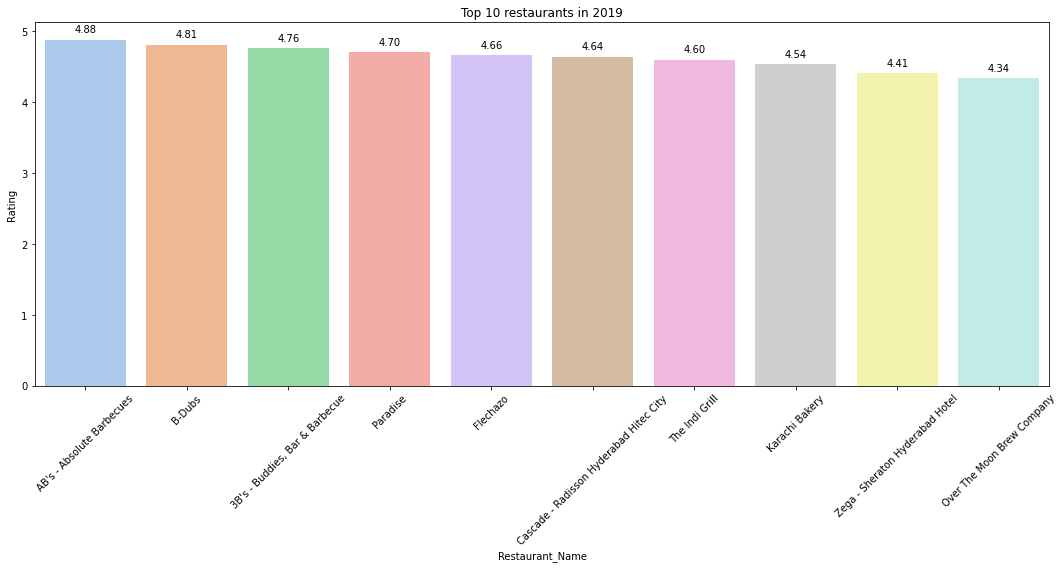

In [37]:
#Maxmimum 
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan          # Making the dat uniform 
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')    # Ref. cells below 
'''
First lets groupby wrt. year and find the mean rating of resturaunts 
'''

yw_avg_rating = reviews_df.groupby(['Restaurant', 'Year'])['Rating'].mean().sort_values(ascending = False).reset_index()
twenty_ninteen = yw_avg_rating[yw_avg_rating.Year == 2019].head(10)
twenty_ninteen

'''
PLot them in graph to visualise 
'''

plt.figure(figsize=(15, 8))
plot = sns.barplot(twenty_ninteen.Restaurant, twenty_ninteen.Rating, palette='pastel')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2019')
plt.tight_layout()

In [38]:
reviews_df['Rating'].value_counts()

5.00    3832
4.00    2373
1.00    1735
3.00    1193
2.00     684
4.50      69
3.50      47
2.50      19
1.50       9
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


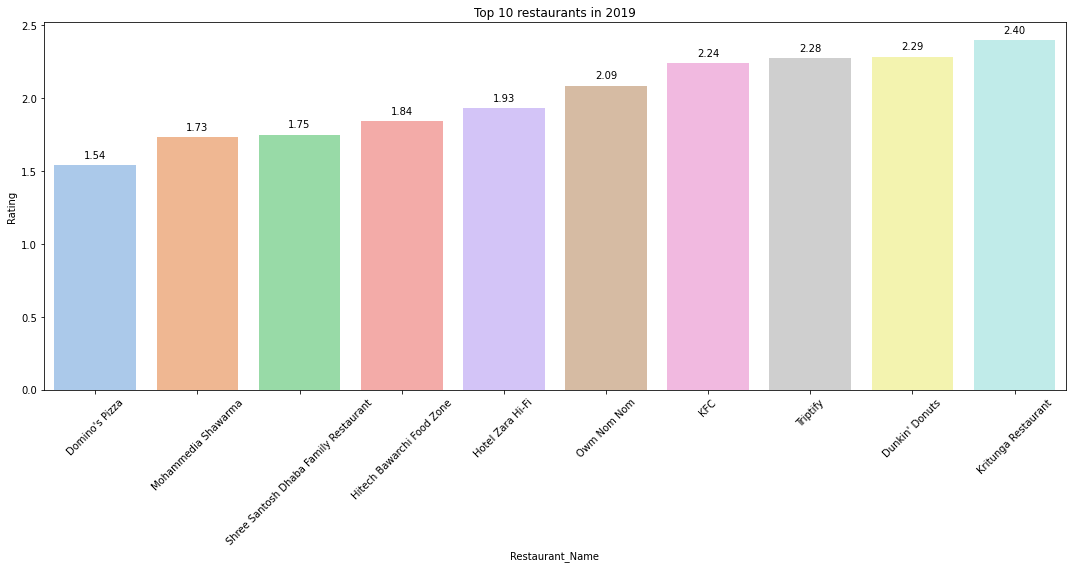

In [39]:
#Maxmimum 

'''
First lets groupby wrt. year and find the mean rating of resturaunts 
'''

yw_avg_rating = reviews_df.groupby(['Restaurant', 'Year'])['Rating'].mean().sort_values(ascending = True).reset_index()
twenty_ninteen = yw_avg_rating[yw_avg_rating.Year == 2019].head(10)
twenty_ninteen

'''
PLot them in graph to visualise 
'''

plt.figure(figsize=(15, 8))
plot = sns.barplot(twenty_ninteen.Restaurant, twenty_ninteen.Rating, palette='pastel')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2019')
plt.tight_layout()

Q. Explore Ratings

In [40]:
reviews_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, nan])

In [41]:
'''
Ratings column contains values 'Like' we will impute this value with Np.nan
'''

reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan

'''
Converting the ratings column into float type 
'''

reviews_df['Rating'] = reviews_df['Rating'].astype('float64')


Returants with top mean ratings 


Text(0.5, 1.0, 'Top Rated 10 Restaurants')

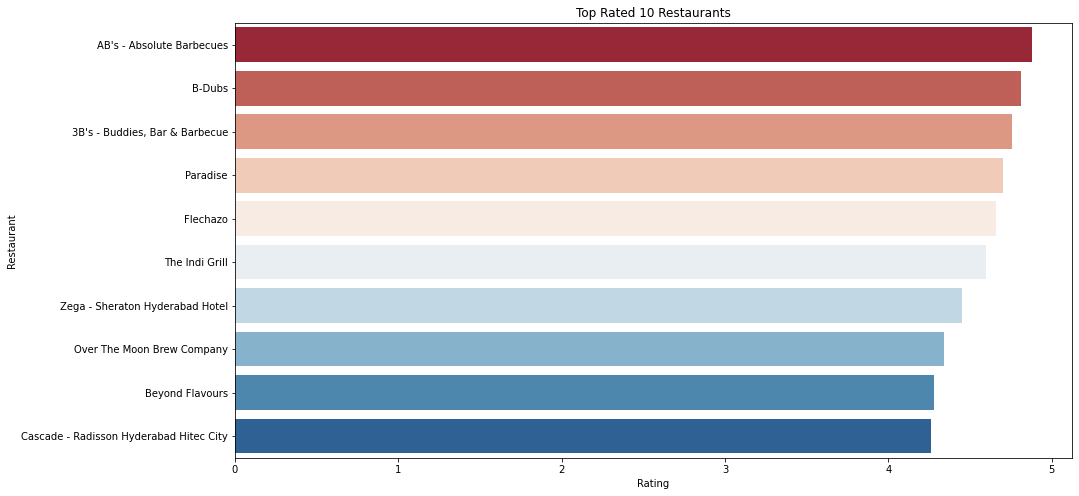

In [42]:
df_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
df_rating = df_rating.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(15,8))
sns.barplot(data=df_rating, x='Rating', y='Restaurant', palette='RdBu')
plt.title('Top Rated 10 Restaurants')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


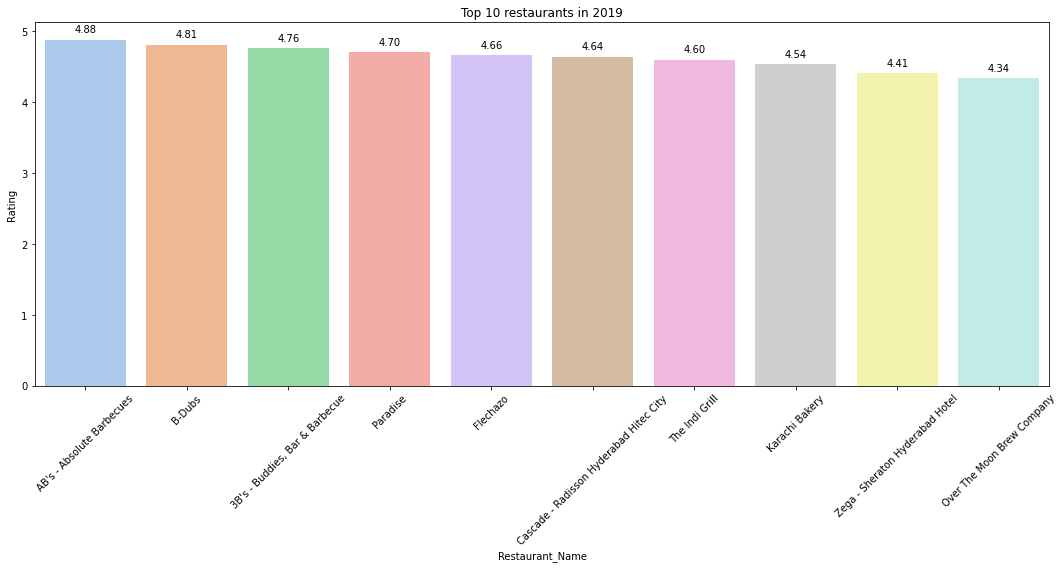

In [43]:
yw_avg_rating = reviews_df.groupby(['Restaurant', 'Year'])['Rating'].mean().sort_values(ascending = False).reset_index()
twenty_ninteen = yw_avg_rating[yw_avg_rating.Year == 2019].head(10)
twenty_ninteen

plt.figure(figsize=(15, 8))
plot = sns.barplot(twenty_ninteen.Restaurant, twenty_ninteen.Rating, palette='pastel')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2019')
plt.tight_layout()

Q. 
Exploring meta data. 

In [44]:
reviews_df['Metadata']

0             1 Review , 2 Followers
1            3 Reviews , 2 Followers
2            2 Reviews , 3 Followers
3              1 Review , 1 Follower
4            3 Reviews , 2 Followers
                    ...             
9995       53 Reviews , 54 Followers
9996        2 Reviews , 53 Followers
9997      65 Reviews , 423 Followers
9998      13 Reviews , 144 Followers
9999    472 Reviews , 1302 Followers
Name: Metadata, Length: 9962, dtype: object

In [45]:
'''
Splitting MetaData into Followers and reviews 
'''

reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str

'''
Conveting the newly created columns into Followers and Reviews 
'''
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])

'''
Dropping the Reviews Column 
'''

reviews_df = reviews_df.drop(['Metadata'], axis =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """


Imputing the values with zero as it is quite possible that the user has no followers and zero reviews 

In [46]:
reviews_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, nan])

In [47]:
''' Imputing nan values with 0 '''

#reviews_df.loc[reviews_df['Review'].isna()] = 0

reviews_df.loc[reviews_df['Followers'].isna()] = 0

In [48]:
reviews_df

,Restaurant,Reviewer,Review,Rating,Pictures,Year,Month,Hour,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.00,0.00,2019.00,5.00,15.00,1.00,2.00
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.00,0.00,2019.00,5.00,14.00,3.00,2.00
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.00,0.00,2019.00,5.00,22.00,2.00,3.00
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.00,0.00,2019.00,5.00,22.00,1.00,1.00
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.00,0.00,2019.00,5.00,21.00,3.00,2.00
...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.00,0.00,2016.00,6.00,0.00,53.00,54.00
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.50,0.00,2016.00,6.00,22.00,2.00,53.00
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.50,3.00,2016.00,6.00,10.00,65.00,423.00
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.00,0.00,2016.00,5.00,17.00,13.00,144.00


# Exploratory Data Analysis 

In [49]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Pictures', 'Year',
       'Month', 'Hour', 'Reviews', 'Followers'],
      dtype='object')

In [50]:
meta_df.columns

Index(['index', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'latitude', 'longitude', 'additional_services', 'Has_Featured',
       'known_for', 'status', 'Popular_Dishes'],
      dtype='object')

Q. Explore the reviews of resturaunts with the most and the least ratings.

List size: 57


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

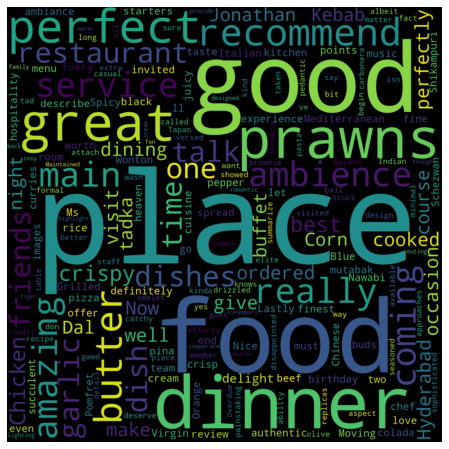

In [51]:
'''
Let us first group the required data 
'''

a = reviews_df.groupby(['Restaurant', 'Year','Review'])['Rating'].mean().sort_values(ascending = False).reset_index()
b = a[a.Year == 2019].head(10)

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'Review')
cld(d)

In [52]:
b

,Restaurant,Year,Review,Rating
0,Khaan Saab,2019.00,Food was very good .. service is even better.....,5.00
1,Jonathan's Kitchen - Holiday Inn Express & Suites,2019.00,"This review has been long overdue, I visited t...",5.00
2,Jonathan's Kitchen - Holiday Inn Express & Suites,2019.00,I was invited to this place by one of my frien...,5.00
3,Jonathan's Kitchen - Holiday Inn Express & Suites,2019.00,I went to Jonathan's with team. I fell in love...,5.00
4,Jonathan's Kitchen - Holiday Inn Express & Suites,2019.00,"Love your ambience , food and hospitality. Tha...",5.00
5,Jonathan's Kitchen - Holiday Inn Express & Suites,2019.00,Nice ambiance. This place has a very good fine...,5.00
7,Jonathan's Kitchen - Holiday Inn Express & Suites,2019.00,One of Hyderabad's most stylish fine dining pl...,5.00
8,Jonathan's Kitchen - Holiday Inn Express & Suites,2019.00,One of the few places in Hyderabad to boast of...,5.00
11,Jonathan's Kitchen - Holiday Inn Express & Suites,2019.00,Quality of food is really great. Ingredients a...,5.00
12,Jonathan's Kitchen - Holiday Inn Express & Suites,2019.00,"Team's is quite good , especially The two host...",5.00


List size: 18


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

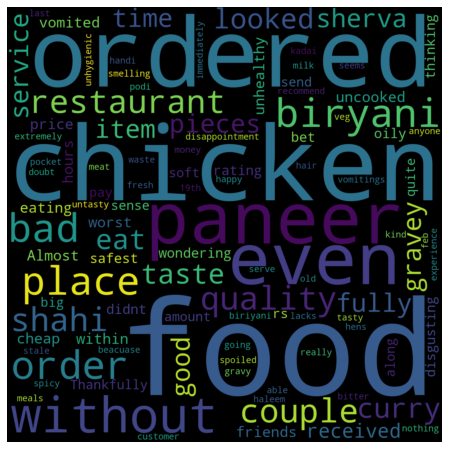

In [53]:
'''
Let us first group the required data 
'''

a = reviews_df.groupby(['Restaurant', 'Year','Review'])['Rating'].mean().sort_values(ascending = True).reset_index()
b = a[a.Year == 2019].head(10)

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'Review')
cld(d)

Q. What are the additional features offered in expensive resuraunts ? 

List size: 114


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

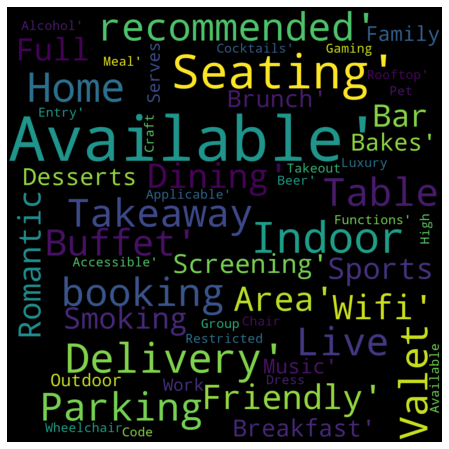

In [54]:
'''
Let us first group the required data 
'''

b = meta_df.sort_values(by='Cost',ascending = False).reset_index()[0:15]

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'additional_services')
cld(d)

List size: 12


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

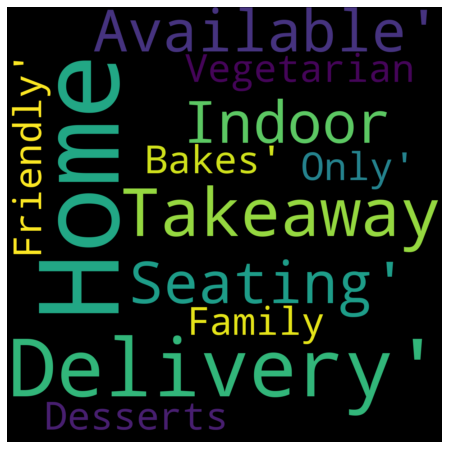

In [55]:
'''
Let us first group the required data 
'''

b = meta_df.sort_values(by='Cost',ascending = True).reset_index()[0:15]

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'additional_services')
cld(d)

Q. What are the popular dishes in both expensive and cheap resturaunts 

List size: 72


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

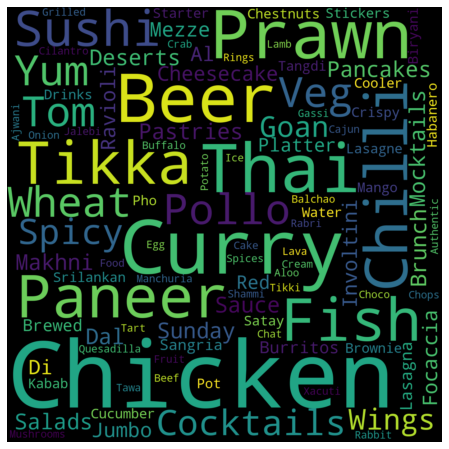

In [56]:
'''
Let us first group the required data 
'''

b = meta_df.sort_values(by='Cost',ascending = False).reset_index()[0:15]

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'Popular_Dishes')
cld(d)

List size: 16


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

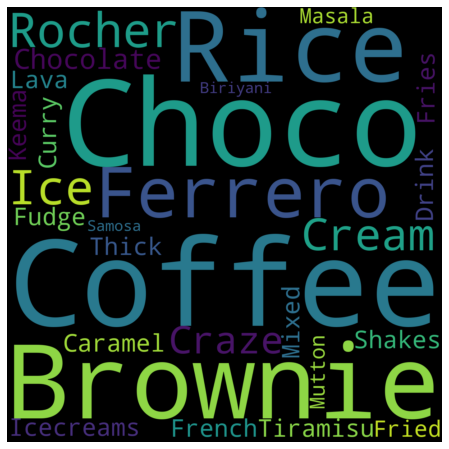

In [57]:
'''
Let us first group the required data 
'''

b = meta_df.sort_values(by='Cost',ascending = True).reset_index()[0:15]

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'Popular_Dishes')
cld(d)

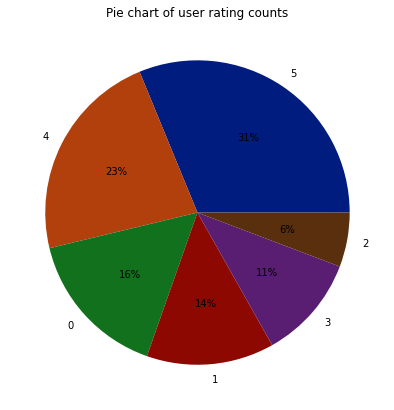

In [58]:

## Let us look at the distribution of the ratings
plt.figure(figsize=(10, 7))
# Rounding off the ratings to nearest upper integers
reviews_df['Rating'] = reviews_df['Rating'].apply(lambda x: math.floor(x+0.6))
plot_df = reviews_df['Rating'].value_counts().reset_index().rename(columns={'index':'Rating','Rating':'count'})

# declaring exploding pie
explode = [0.1, 0, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(plot_df['count'], labels=plot_df['Rating'], colors=palette_color,explode=None, autopct='%.0f%%')
plt.title('Pie chart of user rating counts')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


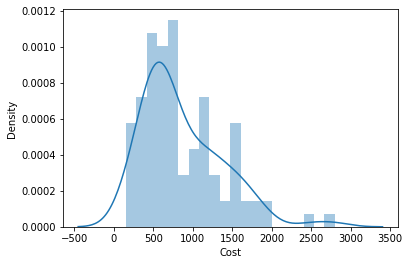

In [59]:
## Let us look at the distribution of the per person costs of the restaurants
sns.distplot(a=meta_df['Cost'], bins=20,kde=True,hist = True)

In [60]:
# Review per hour
reviews_hour = reviews_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')


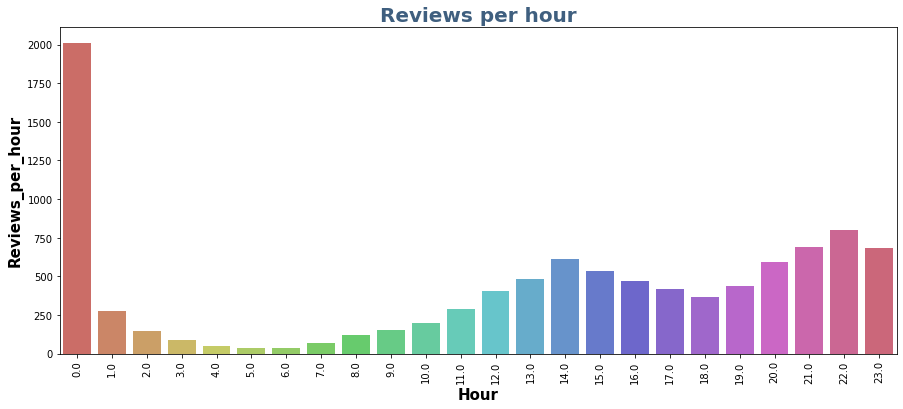

In [61]:
# plotting reviews per hour
plt.figure(figsize=(15,6))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='hls')
plt.show()

# Sentiment analysis 

## Text processing

In [62]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 


In [63]:
import nltk.sentiment.vader 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [64]:
# Natural Language Tool Kit
import nltk
nltk.download('stopwords')
import nltk.sentiment.vader 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA

from nltk. tokenize import word_tokenize, RegexpTokenizer 
from nltk.corpus import stopwords 
tokenizer= RegexpTokenizer (r"\w+")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [111]:
review_df = pd.read_csv('https://raw.githubusercontent.com/NaithaniAR/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Zomato%20Restaurant%20reviews.csv')

In [114]:
review_df.shape

(9955, 7)

In [113]:
review_df.dropna(inplace = True)

In [115]:
review_df.reset_index(inplace=True)

In [212]:
sia= SIA()
results = []
for line in review_df['Review']:
    
    scores = sia.polarity_scores (line)
    scores['clean_review1'] = line
    results.append(scores)

df=pd.DataFrame.from_records (results)

df

,neg,neu,pos,compound,clean_review1
0,0.00,0.61,0.39,0.97,"The ambience was good, food was quite good . h..."
1,0.00,0.59,0.41,0.94,Ambience is too good for a pleasant evening. S...
2,0.00,0.70,0.30,0.92,A must try.. great food great ambience. Thnx f...
3,0.00,0.72,0.28,0.86,Soumen das and Arun was a great guy. Only beca...
4,0.00,0.60,0.40,0.92,Food is good.we ordered Kodi drumsticks and ba...
...,...,...,...,...,...
9950,0.03,0.75,0.22,0.99,Madhumathi Mahajan Well to start with nice cou...
9951,0.00,0.66,0.34,0.97,This place has never disappointed us.. The foo...
9952,0.05,0.81,0.14,0.98,"Bad rating is mainly because of ""Chicken Bone ..."
9953,0.02,0.81,0.16,0.94,I personally love and prefer Chinese Food. Had...


In [213]:
 df=df.join(review_df)
 

In [214]:
 df[df['clean_review1']!= df['Review']]

,neg,neu,pos,compound,clean_review1,index,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures


In [215]:
df.columns

Index(['neg', 'neu', 'pos', 'compound', 'clean_review1', 'index', 'Restaurant',
       'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures'],
      dtype='object')

In [216]:
df.drop(['index', 'clean_review1'], axis = 1)

,neg,neu,pos,compound,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,0.00,0.61,0.39,0.97,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,0.00,0.59,0.41,0.94,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,0.00,0.70,0.30,0.92,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,0.00,0.72,0.28,0.86,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,0.00,0.60,0.40,0.92,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...,...,...,...,...
9950,0.03,0.75,0.22,0.99,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9951,0.00,0.66,0.34,0.97,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9952,0.05,0.81,0.14,0.98,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9953,0.02,0.81,0.16,0.94,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


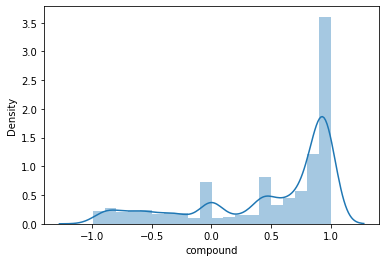

In [217]:
## Let us look at the distribution of the per person costs of the restaurants
sns.distplot(a=df['compound'], bins=20,kde=True,hist = True)

In [225]:
df["label"] = 0

df.loc[df["compound"]> 0.1,'label']  =  1

df.loc[df["compound"]< 0.1,'label']  = -1
df.head()



df.loc[df["compound"]> 0.1,'Mood']  =  'positive'
df.loc[df["compound"]< 0.1,'Mood']  =   'negative'
df.loc[df["compound"]==0.0 , 'label']   =  0
df.loc[df["compound"]==0.0 , 'Mood']   =  'neutral'


df.head()


,neg,neu,pos,compound,clean_review1,index,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,label,Mood
0,0.00,0.61,0.39,0.97,"The ambience was good, food was quite good . h...",0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,1,positive
1,0.00,0.59,0.41,0.94,Ambience is too good for a pleasant evening. S...,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,1,positive
2,0.00,0.70,0.30,0.92,A must try.. great food great ambience. Thnx f...,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,1,positive
3,0.00,0.72,0.28,0.86,Soumen das and Arun was a great guy. Only beca...,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,1,positive
4,0.00,0.60,0.40,0.92,Food is good.we ordered Kodi drumsticks and ba...,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,1,positive


In [ ]:
#Lets see pie plot of Overall Customer Sentiment about there Experiance @ Zomato Restaurants
plt.figure(figsize=(10,10))
plt.pie( review_df.Sentiment.value_counts() ,labels=review_df.Sentiment.value_counts().index,autopct='%1.2f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Pie Chart of sentiments of the user reviews')
plt.show()

In [226]:
print(df.label.value_counts()) 
print(df.label.value_counts(normalize=True)* 100)

 1    7343
-1    1966
 0     646
Name: label, dtype: int64
 1   73.76
-1   19.75
 0    6.49
Name: label, dtype: float64


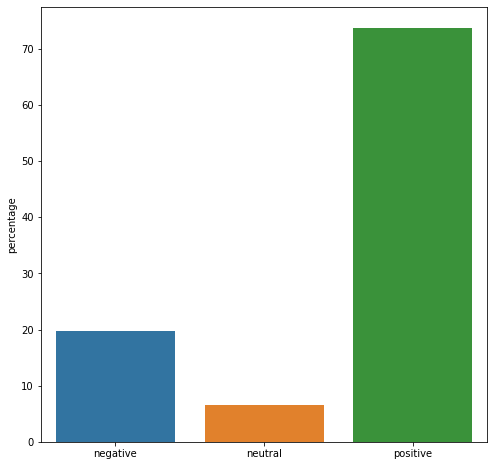

In [228]:
fig, ax = plt.subplots (figsize =(8,8))

counts = df.label.value_counts (normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['negative','neutral','positive'])
ax.set_ylabel("percentage")
plt.show()

In [229]:
stop_words = stopwords.words('english')

def process_text (headlines):
 tokens = []
 for line in headlines:
    toks= tokenizer.tokenize(line)
    toks= [t.lower() for t in toks if t.lower() not in stop_words]
    tokens.extend (toks)
 return tokens

In [230]:
pos_lines= list(df[df.label==1].Review)
pos_tokens = process_text(pos_lines) 
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(10)

[('good', 6551),
 ('food', 5356),
 ('place', 5012),
 ('service', 2687),
 ('5', 2520),
 ('chicken', 2520),
 ('ambience', 1931),
 ('great', 1871),
 ('taste', 1804),
 ('one', 1608)]

In [231]:
pos_lines= list(df[df.label==-1].Review)
pos_tokens = process_text(pos_lines) 
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(10)

[('food', 1181),
 ('place', 689),
 ('good', 671),
 ('ordered', 591),
 ('service', 544),
 ('bad', 541),
 ('chicken', 524),
 ('worst', 491),
 ('order', 459),
 ('taste', 451)]

In [233]:
neu_lines= list(df[df.label==0].Review)
neu_tokens = process_text(neu_lines) 
neu_freq = nltk.FreqDist(neu_tokens)
neu_freq.most_common(10)

[('food', 104),
 ('delivery', 80),
 ('time', 72),
 ('ordered', 71),
 ('less', 63),
 ('chicken', 61),
 ('quantity', 53),
 ('order', 48),
 ('biryani', 42),
 ('delivered', 42)]